## Bayesian Statistical inference

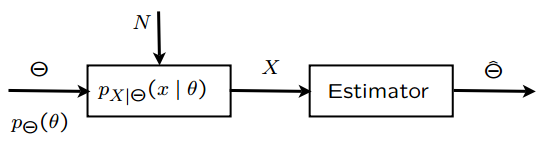

We use bayesian rule's to do estimation:
$$f_{\theta\vert X}(\theta\vert x) = \frac{f_{X\vert \theta}(x\vert \theta)f_\theta(\theta)}{f_X(x)}$$
notice we can apply either discrete or continuous random variable to both $\theta$ and $X$, which mean $f$ can be replaced by $p$

After lots of experiment, we have a posterior distribution of $f_{\theta\vert X}(\theta\vert x)$, we need a single final result of what $\theta$ is. Here we use Maximum a posteriori probability (MAP)
### MAP
If $\theta$ is discrete r.v. then we can choose the highest probability $\theta$ in $p_{\theta\vert X}(\theta\vert x)$:
$$f_{\Theta\vert X}(\theta^*\vert x)=max_\theta p_{\Theta\vert X}(\theta\vert x)$$

But in continuous case, any $\theta$ has probability 0, we seems need to calculate the expectation of $\Theta$ under condition $X$

### Conditional expectation
$$E[\Theta\vert X=y] = \int\theta f_{\Theta\vert X}(\theta\vert x)d\theta$$

### Least mean square estimation
we have a r.v. $\Theta$ and we want to find a number which gives the least square for $\Theta$
$$min E[(\Theta-c)^2] = E[\Theta^2] - 2cE[\Theta]+c^2$$
$$\frac{d}{dc}E[(\Theta-c)^2] = 0$$
$$c = E[\Theta]$$
$$E[(\Theta-c)^2] = var(\Theta)$$

we can also apply condition to the result.
$$min E[(\Theta-c)^2 \vert X=x]$$
$$c = E[\Theta \vert X=x]$$

Suppose we have an estimator $g(X)$ which gives us over all $\hat{\Theta}$, compare to our vanilla estimator $E[\Theta|X=x]$, our vanilla version should be more accurate under $X=x$ condition.

$$E[(\Theta-E[\Theta\vert X=x])^2\vert X=x] \le E[(\Theta-g(x))^2\vert X=x]$$
$$E[(\Theta-E[\Theta\vert X=x])^2\vert X] \le E[(\Theta-g(x))^2\vert X]$$
$$E[(\Theta-E[\Theta\vert X=x])^2] \le E[(\Theta-g(x))^2]$$

So $E[\Theta\vert X]$ minimizes $E[(\Theta-g(X))^2]$, $E[\Theta\vert X]$ is the best estimator, but it is hard to calculate.

#### property
Estimator: $\hat{\Theta} = E[\Theta\vert X]$

Estimation error: $\tilde{\Theta} = \hat{\Theta}-\Theta$

$$E[\tilde\Theta] = 0$$
$$E[\tilde\Theta\vert X=x] = 0$$
$$E[\tilde\Theta h(X)\vert X] = h(X)E[\tilde\Theta\vert X] = 0$$
$$E[\tilde\Theta h(X)] = 0$$
Because $\hat\Theta$ is a function of $X$:
$$cov(\tilde\Theta, \hat\Theta) = E[\tilde\Theta \hat\Theta]-E[\tilde\Theta]E[\hat\Theta] = 0$$

This tells us no matter what value the $\hat\Theta$ is, we should not expect $\tilde\Theta$ go to a specific direction. If we believe the $\hat\Theta$ has correlation with $\tilde\Theta$, that means our $\hat\Theta$ is wrong. If we use conditional expectation, this should not happen.

$$var(\Theta) = var(\hat\Theta)+var(\tilde\Theta)$$

## Classical Statistical Inference
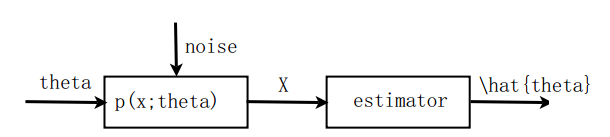

The difference between Bayesian and classical is in Bayesian $\theta$ is a r.v., but here the $\theta$ is a constant number. But the estimated $\hat{\theta}$ are r.v. in both cases because the input $X$ is a r.v.

### Maximum likelihood estimation
$$\hat{\theta}_{ML} = arg\ max_{\theta}p_X(x;\theta)$$

The meaning of this method is, try different $\theta$, pick up a $\theta$ which gives the closest result.

#### compare to Bayesian MAP
$$f_{\Theta\vert X}(\theta^*\vert x)=max_\theta p_{\Theta\vert X}(\theta\vert x)$$
Looks like the observation and $\theta$ has different order, but if we expand it with Bayesian:

$$f_{\Theta\vert X}(\theta^*\vert x)=max_\theta \frac{f_{X\vert \theta}(x\vert \theta)f_\theta(\theta)}{f_X(x)}$$
For denominator, we can get the probability of $X$, and because of classical inference, $\theta$ is a const number, so we only have:
$$f_{\Theta\vert X}(\theta^*\vert x)=max_\theta f_{X\vert \theta}(x\vert \theta)$$
which looks very similar to classical MAP.

### application for MAP
we can use MAP to estimate exponential distribution:
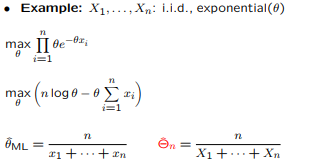
from step 1 to step 2, we use log, from 2 to 3 we do differential.

### concept of bias
An unbiased estimation should have property:
$$E[\hat\Theta_n] = \theta$$
$$E[\hat\sigma_n^2] = \sigma^2$$

from variance formula, we can get:
$$E[(\hat\Theta-\theta)^2] = var(\hat\Theta-\theta)+E^2[\hat\Theta-\theta]=var(\hat\Theta)+(bias)^2$$

### confidential intervals
Instead of telling the single number of estimation, sometimes, we prefer to tell an interval with a confidence that the true value fall inside of this interval:
$$P(\hat\Theta_n^- \le \theta \le \hat\Theta_n^+) \ge 1-\alpha$$
for mean estimation, we can use CLT to get the interval approximately(note that CLT is an approximation)
for example if we want get a interval for mean $\theta$ and has 95% confidence, then:
$$P(\frac{\vert\hat\Theta_n-\theta\vert}{\sigma/\sqrt{n}}\le 1.96) \approx 0.95$$
$$P(\hat\Theta_n-\frac{1.96\sigma}{\sqrt{n}} \le \theta \le \hat\Theta_n+\frac{1.96\sigma}{\sqrt{n}}) \approx 0.95$$

more generally: let z be $\Phi(z)=1-\alpha/2$
$$P(\hat\Theta_n-\frac{z\sigma}{\sqrt{n}} \le \theta \le \hat\Theta_n+\frac{z\sigma}{\sqrt{n}}) \approx 1-\alpha$$

### estimate $\sigma$

option 1 is get the largest $\sigma$ which is a very conservative estimation and will give us a very large CI

option 2 is use ad hoc value for the observation

option 3 is the generic estimation of the variance

we know the variance should be:

$$\sigma^2 = E[(X_i-\theta)^2]$$

then:

$$\hat\sigma_n^2 = \frac{1}{n}\Sigma_{i=1}^n(X_i-\theta)^2 -> \sigma^2$$
but, we can not get $\theta$, we can only get $\hat\Theta_n$, then how to get a unbiased estimation for the variance?

Suppose we have an estimation for variance:
$$s_n^2 = \frac{1}{n}\Sigma_{i=1}^n(X_i-\hat\Theta_n)^2$$

We can find the bias of this estimation:
$$E[\sigma^2-s_n^2] = E[\frac{1}{n}\Sigma_{i=1}^n(X_i-\theta)^2-\frac{1}{n}\Sigma_{i=1}^n(X_i-\hat\Theta_n)^2]$$
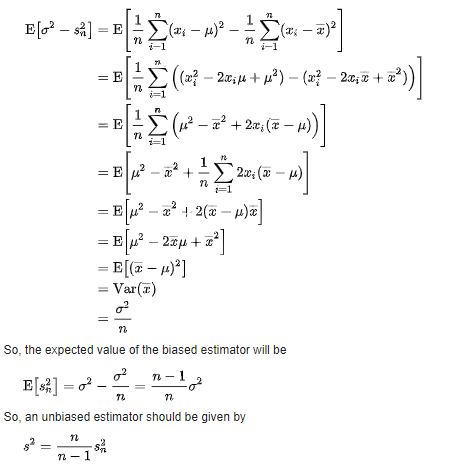

So:
$$s^2 = \frac{1}{n-1}\Sigma_{i=1}^n(X_i-\hat\Theta_n)^2$$
This will give us an unbiased estimation for variance.

## Linear regression